In [3]:
from tfpmodels import independentFactorAnalysis, centeredIndependentFactorAnalysis

In [4]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
ed = tfp.edward2
import numpy as np

In [5]:
from future_features import tape

In [6]:
import matplotlib.pyplot as plt

In [7]:
try:
  tf.enable_eager_execution()
except:
  pass

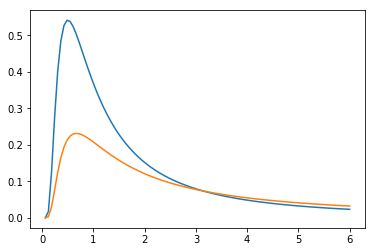

In [8]:
xs = np.linspace(0,6,100)
plt.plot(xs,tfd.InverseGamma(1.,1.).prob(xs.astype(np.float32)))
plt.plot(xs,tfd.InverseGamma(.5,1.).prob(xs.astype(np.float32)))

In [9]:
def star(f, *args, **kwargs):
    name = kwargs.get("name")
    if name == 'mixture_component_std':
        return np.column_stack([1e-10*np.ones(2, dtype='float32'), 10*np.ones(2,dtype='float32')])
    if name == 'mixture_weights':
        return np.column_stack([0.999*np.ones(2, dtype='float32'), 0.001*np.ones(2,dtype='float32')]).T
    if name == 'data_std':
        return 1e-10*np.ones((1,2), dtype='float32')
    if name == 'factor_loadings':
        return np.eye(2,dtype='float32')
    else:
        return f(*args,**kwargs)

In [10]:
def change_priors(f, *args, **kwargs):
    name = kwargs.get("name")
    if name == 'mixture_component_std':
        return ed.InverseGamma(concentration=.5, rate=.5, sample_shape=(n_sources,n_components_in_mixture), name='mixture_component_std')
    else:
        return f(*args,**kwargs)

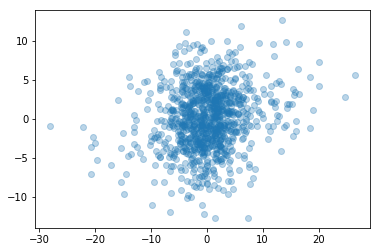

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[ 0.5357058 ,  0.72497034],
       [ 0.88477194, 10.148279  ]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.83176625, 0.16823377],
       [0.7133484 , 0.28665167]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[-0.48787332, 21.479042  ],
       [-1.1296015 , -2.516272  ],
       [ 0.31851155, -0.87265444],
       ...,
       [ 0.62702906,  4.1406837 ],
       [ 0.27296543, -2.2432396 ],
       [-0.06713033,  0.57707316]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[ 1.4375832 , -0.24791734],
       [-0.8373672 , -0.19332284]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[3.3610773, 3.9819958]], dtype=f

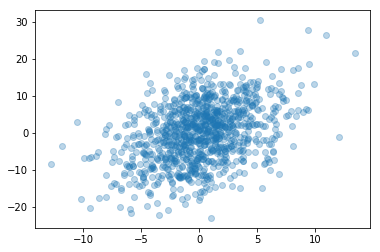

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[ 1.2987814, 12.344452 ],
       [ 0.5446552,  2.7252119]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.10774196, 0.89225805],
       [0.1579848 , 0.8420152 ]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[-12.972742 ,  -4.0712314],
       [  2.1707523,   2.6746569],
       [  0.8733526,   0.7800845],
       ...,
       [  5.9779167,  -0.8277811],
       [ 30.945599 ,   2.009614 ],
       [ 21.25903  ,  -0.8762344]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[0.28463376, 0.21378031],
       [0.2841064 , 1.0210538 ]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[0.23623464, 7.544562  ]], dtype=float32

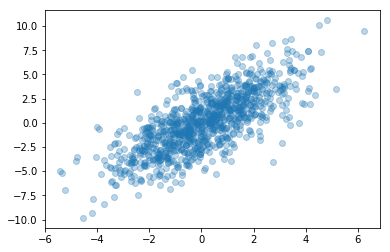

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[1.3332801, 0.6906028],
       [3.1157055, 1.2660924]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.90644556, 0.09355442],
       [0.9089351 , 0.09106488]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[-0.5553066 , -3.0750995 ],
       [-0.23276943,  1.724841  ],
       [-0.94919103, -0.655532  ],
       ...,
       [-0.83667547, -1.3358843 ],
       [-0.5805687 , -0.8360475 ],
       [-0.15091364, -0.1063992 ]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[0.72387385, 0.46791622],
       [0.5003489 , 0.9028463 ]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[0.5752611, 1.6285831]], dtype=float32)>), (

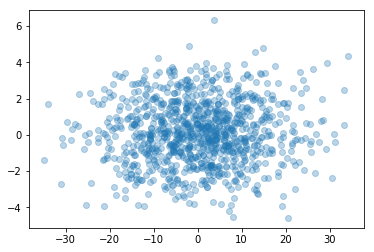

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[0.24535523, 1.1588815 ],
       [1.3346313 , 0.9180969 ]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.91633046, 0.08366954],
       [0.8958097 , 0.10419027]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[ 0.11700817,  0.7064543 ],
       [ 0.21751557,  2.6356914 ],
       [ 0.22650619,  1.701776  ],
       ...,
       [-0.7288884 ,  1.3145792 ],
       [-0.16889845, -0.1693906 ],
       [-0.2407145 , -1.4710143 ]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[-1.0060107 , -1.2297214 ],
       [ 0.23916857,  0.85394377]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[11.3321495,  1.1839284]], dtype=flo

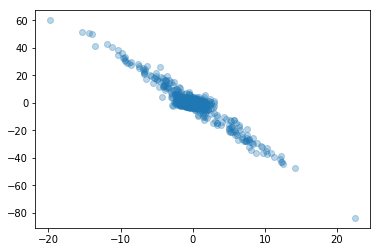

OrderedDict([('mixture_component_std', <ed.RandomVariable 'mixture_component_std/' shape=(2, 2) dtype=float32 numpy=
array([[11.461054 ,  0.7074793],
       [ 1.2354978,  2.873277 ]], dtype=float32)>), ('mixture_weights', <ed.RandomVariable 'mixture_weights/' shape=(2, 2) dtype=float32 numpy=
array([[0.24756567, 0.7524344 ],
       [0.3035791 , 0.6964209 ]], dtype=float32)>), ('sources', <ed.RandomVariable 'sources/' shape=(1000, 2) dtype=float32 numpy=
array([[ 3.630939  , -1.0752482 ],
       [-0.35111022, -2.1618078 ],
       [-5.6015377 , -0.96547955],
       ...,
       [ 0.03902998, -0.12872522],
       [-0.02884136,  0.67790455],
       [-9.055894  ,  0.26389596]], dtype=float32)>), ('factor_loadings', <ed.RandomVariable 'factor_loadings/' shape=(2, 2) dtype=float32 numpy=
array([[-0.54580843,  1.9277698 ],
       [-0.01791898, -0.41894686]], dtype=float32)>), ('data_std', <ed.RandomVariable 'data_std/' shape=(1, 2) dtype=float32 numpy=array([[0.90121406, 0.6529581 ]], dtype=flo

In [11]:
for i in range(5):
    with ed.interception(change_priors):
        with tape() as this_tape:
            model = centeredIndependentFactorAnalysis(n_components_in_mixture=2,n_sources=2,n_features=2)
            plt.scatter(*model.numpy().T,alpha=.3)
            plt.show()
        print(this_tape)

In [13]:
from mapper import *

SyntaxError: invalid syntax (mapper.py, line 36)